In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-04-06 16:39:25.450390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
btc = pd.read_csv('btc_prediction_datawranglingStage.csv')

In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2059 non-null   object 
 1   open    2059 non-null   float64
 2   high    2059 non-null   float64
 3   low     2059 non-null   float64
 4   close   2059 non-null   float64
 5   volume  2059 non-null   float64
dtypes: float64(5), object(1)
memory usage: 96.6+ KB


In [4]:
target = btc['close'].values

In [5]:
btc_features = btc.drop('Date', axis=1)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
btc_scaled = scaler.fit_transform(btc_features)

In [7]:
btc_scaled_df = pd.DataFrame(btc_scaled, columns=btc_features.columns)
btc_scaled_df['Date'] = btc['Date']
btc_scaled_df.set_index('Date', inplace=True)
print(btc_scaled_df.head())

                open      high       low     close    volume
Date                                                        
2017-08-17  0.016685  0.018394  0.021824  0.017036  0.000746
2017-08-18  0.017052  0.016661  0.017692  0.014290  0.001278
2017-08-19  0.014305  0.013818  0.016292  0.014781  0.000201
2017-08-20  0.014501  0.014220  0.019172  0.013946  0.000314
2017-08-21  0.013695  0.012828  0.017267  0.012854  0.000610


In [8]:
seq_len = 1
train_size = int(len(btc_scaled_df) * 0.9)
train_data = btc_scaled_df.iloc[:train_size]
test_data = btc_scaled_df.iloc[train_size:]

In [9]:
def create_sequences(data, seq_len):
    if len(data) < seq_len:
        raise ValueError("Length of data is less than sequence length")
    X = []
    y = []
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len:i].values)
        y.append(data.iloc[i].values)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [10]:
input_cols = ['open', 'high', 'low', 'close',]
X_train, y_train = create_sequences(train_data[input_cols], seq_len)
X_test, y_test = create_sequences(test_data[input_cols], seq_len)

In [11]:
X_train

array([[[0.0166849 , 0.01839357, 0.02182369, 0.01703628]],

       [[0.01705172, 0.01666101, 0.01769203, 0.01428964]],

       [[0.01430512, 0.01381835, 0.01629199, 0.01478096]],

       ...,

       [[0.25074727, 0.27875448, 0.25983197, 0.28243691]],

       [[0.28247169, 0.28200415, 0.28852637, 0.28691693]],

       [[0.28691061, 0.28275274, 0.29229372, 0.28969186]]])

In [12]:
X_train.shape

(1852, 1, 4)

In [13]:
y_train.shape

(1852, 4)

In [14]:
y_test

array([[0.26400665, 0.26269112, 0.26497144, 0.26482025],
       [0.26483898, 0.25947705, 0.26306908, 0.25666271],
       [0.25667442, 0.25277869, 0.26027767, 0.2582391 ],
       [0.25825079, 0.25732805, 0.26702899, 0.26306247],
       [0.26305838, 0.25623651, 0.26052387, 0.25222202],
       [0.25225353, 0.24967782, 0.24312693, 0.25410026],
       [0.25411201, 0.24889301, 0.25068638, 0.24381035],
       [0.24381153, 0.25378289, 0.241446  , 0.23738106],
       [0.23739307, 0.24760809, 0.24507991, 0.25199586],
       [0.25200765, 0.24684474, 0.2478404 , 0.25025938],
       [0.25025036, 0.24404726, 0.25216054, 0.24451756],
       [0.24455262, 0.24197905, 0.24938254, 0.24275932],
       [0.24279844, 0.24409017, 0.25019509, 0.2492943 ],
       [0.2492884 , 0.26032332, 0.25233371, 0.24698318],
       [0.24697903, 0.25125716, 0.24689191, 0.25216979],
       [0.25218157, 0.24905886, 0.25275465, 0.25494721],
       [0.25494387, 0.25726719, 0.25768089, 0.25232196],
       [0.25233374, 0.24660129,

In [15]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')

In [16]:
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
58/58 [==============================] - 2s 4ms/step - loss: 0.0444
Epoch 2/15
58/58 [==============================] - 0s 4ms/step - loss: 7.7746e-04
Epoch 3/15
58/58 [==============================] - 0s 3ms/step - loss: 3.9386e-04
Epoch 4/15
58/58 [==============================] - 0s 3ms/step - loss: 2.5588e-04
Epoch 5/15
58/58 [==============================] - 0s 3ms/step - loss: 2.2399e-04
Epoch 6/15
58/58 [==============================] - 0s 3ms/step - loss: 2.2156e-04
Epoch 7/15
58/58 [==============================] - 0s 3ms/step - loss: 2.1838e-04
Epoch 8/15
58/58 [==============================] - 0s 3ms/step - loss: 2.2193e-04
Epoch 9/15
58/58 [==============================] - 0s 3ms/step - loss: 2.2381e-04
Epoch 10/15
58/58 [==============================] - 0s 3ms/step - loss: 2.1348e-04
Epoch 11/15
58/58 [==============================] - 0s 3ms/step - loss: 2.1446e-04
Epoch 12/15
58/58 [==============================] - 0s 3ms/step - loss: 2.1568e-04
Epoch

In [17]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)

Test loss: 6.661896622972563e-05


In [18]:
y_pred = model.predict(X_test)

7/7 [==============================] - 1s 1ms/step


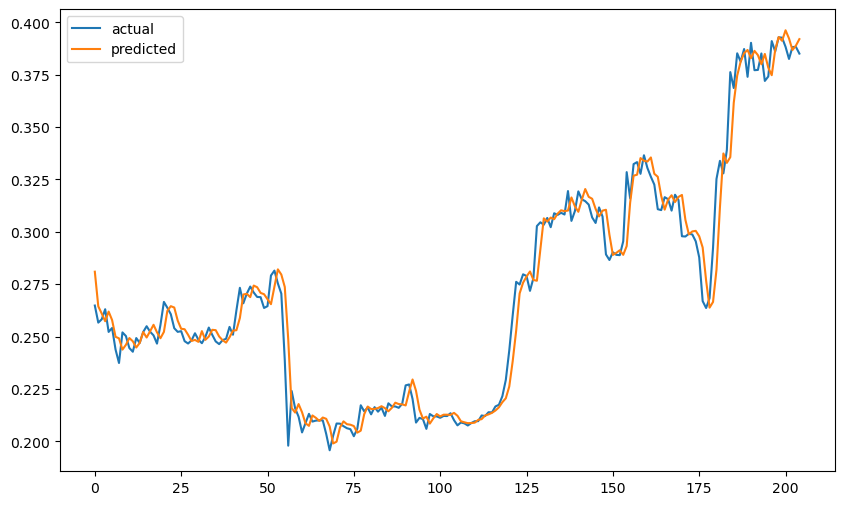

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test[:, 3], label='actual')
plt.plot(y_pred[:, 0], label='predicted')
plt.legend()
plt.show()